In [30]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# Function to search GitHub repositories related to Mamba
def search_github_repos(query, max_results=1000):
    url = f"https://api.github.com/search/repositories?q={query}+in:description&sort=stars&order=desc"
    response = requests.get(url)
    data = response.json()

    # Collect relevant repository details
    repos = []
    for item in data['items'][:max_results]:
        repo = {
            "name": item['name'],
            "description": item['description'],
            "url": item['html_url'],
            "created_at": item['created_at'],
            "updated_at": item['updated_at'],
            "repo_url": item['url']  # This is the repository URL for accessing contents
        }
        repos.append(repo)

    return repos

# Function to filter repositories by date range (2023-2024)
def filter_repos_by_date(repos, start_date, end_date):
    filtered_repos = []
    for repo in repos:
        created_at = datetime.strptime(repo['created_at'], "%Y-%m-%dT%H:%M:%SZ")
        updated_at = datetime.strptime(repo['updated_at'], "%Y-%m-%dT%H:%M:%SZ")

        # Filter repositories based on created or updated date
        if start_date <= created_at <= end_date or start_date <= updated_at <= end_date:
            filtered_repos.append(repo)

    return filtered_repos

# Function to check for mentions of frameworks in the description or .py files (case-insensitive)
def get_frameworks_from_description_or_files(description, files):
    frameworks = {
        "TensorFlow": False,
        "Keras": False,
        "PyTorch": False
    }

    # Check description first
    if description:
        description_lower = description.lower()
        if "tensorflow" in description_lower or "tf" in description_lower:
            frameworks["TensorFlow"] = True
        if "keras" in description_lower:
            frameworks["Keras"] = True
        if "torch" in description_lower:
            frameworks["PyTorch"] = True

    # Now check in .py files
    for file in files:
        if file['name'].endswith(".py"):
            file_content = get_file_content(file['download_url'])
            if file_content:
                file_content_lower = file_content.lower()
                if "tensorflow" in file_content_lower or "tf" in file_content_lower:
                    frameworks["TensorFlow"] = True
                if "keras" in file_content_lower:
                    frameworks["Keras"] = True
                if "torch" in file_content_lower:
                    frameworks["PyTorch"] = True

    return [framework for framework, used in frameworks.items() if used]

# Function to get the content of a .py file from GitHub
def get_file_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    return ""

# Search for GitHub repositories related to "Mamba"
repos = search_github_repos("Mamba", 1000)

# Define the date range for filtering (2023 to 2024)
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)

# Filter the repositories based on the date range
filtered_repos = filter_repos_by_date(repos, start_date, end_date)

# Count the framework mentions
frameworks_count = {
    "TensorFlow": 0,
    "Keras": 0,
    "PyTorch": 0
}

for repo in filtered_repos:
    description = repo['description'] if repo['description'] else ""

    # Get repository files from the GitHub API
    repo_contents_url = f"{repo['repo_url']}/contents"
    response = requests.get(repo_contents_url)
    files = []
    if response.status_code == 200:
        files = response.json()

    # Check for frameworks in the description or .py files
    frameworks = get_frameworks_from_description_or_files(description, files)
    for framework in frameworks:
        frameworks_count[framework] += 1

# Plot the comparison of framework usage
frameworks = list(frameworks_count.keys())
counts = list(frameworks_count.values())



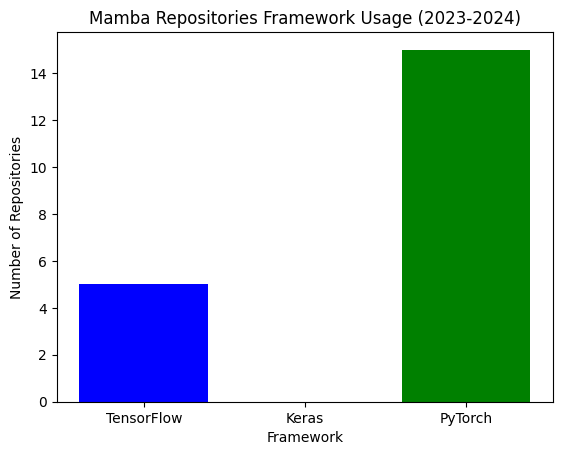

In [32]:
plt.bar(frameworks, counts, color=['blue', 'orange', 'green'])
plt.xlabel('Framework')
plt.ylabel('Number of Repositories')
plt.title('Mamba Repositories Framework Usage (2023-2024)')
plt.savefig('mamba_frame_work_distription', bbox_inches='tight')
plt.show()



In [29]:

# Optionally, print out some of the filtered repositories and their descriptions
for repo in filtered_repos[::]:
    print(f"Repository: {repo['name']}")
    print(f"Description: {repo['description']}")
    print(f"URL: {repo['url']}")
    print(f"Created At: {repo['created_at']}")
    print(f"Updated At: {repo['updated_at']}\n")

Repository: mamba
Description: Mamba SSM architecture
URL: https://github.com/state-spaces/mamba
Created At: 2023-12-01T01:17:39Z
Updated At: 2025-01-15T17:43:57Z

Repository: Vim
Description: [ICML 2024] Vision Mamba: Efficient Visual Representation Learning with Bidirectional State Space Model
URL: https://github.com/hustvl/Vim
Created At: 2024-01-15T09:36:16Z
Updated At: 2025-01-14T15:15:47Z

Repository: mamba-minimal
Description: Simple, minimal implementation of the Mamba SSM in one file of PyTorch.
URL: https://github.com/johnma2006/mamba-minimal
Created At: 2023-12-20T10:39:47Z
Updated At: 2025-01-15T13:59:34Z

Repository: VMamba
Description: VMamba: Visual State Space Models，code is based on mamba
URL: https://github.com/MzeroMiko/VMamba
Created At: 2024-01-11T10:42:25Z
Updated At: 2025-01-15T14:31:55Z

Repository: MambaOut
Description: MambaOut: Do We Really Need Mamba for Vision?
URL: https://github.com/yuweihao/MambaOut
Created At: 2024-05-13T21:14:49Z
Updated At: 2025-01-14